## MNIST 数据集处理

In [17]:
import struct
import numpy as np
# 读取图片信息
with open('../MNIST_data/t10k-images.idx3-ubyte', 'rb') as f:
    f.seek(16)
    content = f.read()
    pics = struct.unpack("{}B".format(len(content)), content)

# 读取标签
with open('../MNIST_data/t10k-labels.idx1-ubyte', 'rb') as f:
    f.seek(8)
    content = f.read()
    #print(labels)
    labels = struct.unpack("{}B".format(len(content)), content)
    #print(labels)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
# reshape，变成 np.array
pics = np.reshape(pics, (-1, 28, 28))
#print (pics)
print(labels)
labels = np.array(labels)
print(labels)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


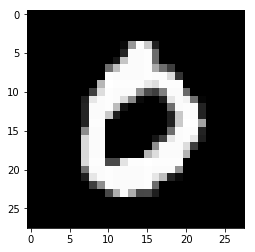

label: 7


In [5]:
# 展示第一张图片
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(pics[3])
plt.gray()
plt.show()

print('label: {}'.format(labels[0]))

### one-hot embedding
将标签映射到对应向量， 7 -> [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]
### 练习1 (10分钟)：
写一个函数将输入的标签变成one-hot embedding

In [19]:
def to_one_hot(labels):
    """将输入的标签数据进行one-hot embedding
    Args:
        labels: 输入标签
    Returns:
        res: one-hot embedding 后的结果，每一行对应一个标签
    """
    l = len(labels)
    res = np.zeros((l, 10), dtype=np.float32)
    for i in range(l):
        res[i][labels[i]] = 1.
    return res

In [20]:
one_hot = to_one_hot(labels)

In [25]:
one_hot[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 练习2（2分钟）：
将pics的值变为0-1之间的一个浮点数

In [ ]:
pics = pics / 255.

### 练习3（15分钟）：
编写一个生成器，根据输入的batch-size，生成对应的mini batch

In [ ]:
def gen_batch(labels, pics, batch_size):
    """
    输入图片与标签数据，根据设置的batch_size生成mini-batch
    Args:
        labels: 标签数据，one-hot格式
        pics: 图片数据
        batch_size: 设置的batch大小
    Yields:
        生成的mini-batch
    """
    pos = 0
    for i in range(len(labels) // batch_size):
        yield pics[pos:pos + batch_size], labels[pos:pos + batch_size]
        pos += batch_size
    remain  = len(labels) % batch_size
    if remain != 0:
        yield pics[-remain:], labels[-remain:]

In [ ]:
for x, y in gen_batch(one_hot, pics, 2):
    print(x)
    print(y)
    plt.imshow(x[0] * 255)
    plt.show()
    break